In [1]:
#Imports

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
import numpy as np
import torch
import torch.nn as nn

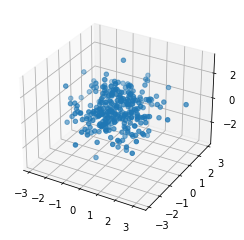

In [2]:
#Generate Input Data
input_tensor = torch.normal(0, 1, size=(300, 3))
#Plot
x, y, z = zip(*input_tensor.numpy())
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, z, cmap='Greens')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


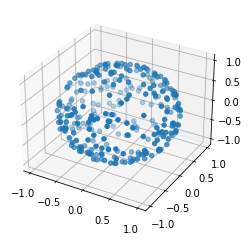

In [3]:
#Find Target Data
radius = np.sqrt(np.sum(np.square(input_tensor.numpy()), axis = -1, keepdims = True))
inverse_radius = 1.0 / radius
target = input_tensor * inverse_radius
target_tensor = torch.tensor(target)
unzipped_target = np.transpose(target)
#Plot
ax = plt.axes(projection='3d')
ax.scatter3D(unzipped_target[0], unzipped_target[1], unzipped_target[2], unzipped_target[2], cmap='Greens')



In [4]:
#Neural Network Model
class Neural_Network(nn.Module):
    
    def __init__(self):
        super(Neural_Network, self).__init__()
        
        #Shape
        self.shape = [3,16,16,3]
        
        # weights
        self.W1 = nn.Linear(self.shape[0], self.shape[1])
        self.W2 = nn.Linear(self.shape[1], self.shape[2]) # 16 X 16 tensor
        self.W3 = nn.Linear(self.shape[2], self.shape[3]) # 16 X 3 tensor
                     
    def forward(self, x):
        relu = torch.nn.ReLU()
        x = relu(self.W1(x))
        x = relu(self.W2(x))
        x = self.W3(x)
        return x

Training Complete


/opt/conda/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:906: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/opt/conda/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:908: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


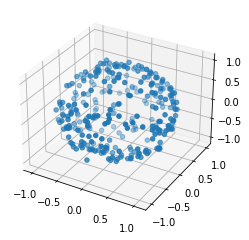

In [5]:
model = Neural_Network()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
loss_values = []

for epoch in range(num_epochs):
    predictions = []
    for x in range(len(input_tensor)):
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward + backward + optimize
        pred = model(input_tensor[x])
        loss = loss_fn(pred, target_tensor[x])
        loss_values.append(loss.item())
        loss.backward()
        optimizer.step()
        predictions.append(pred.detach().numpy())

print("Training Complete")

#Plot Target
unzipped_preds = np.transpose(predictions)
ax = plt.axes(projection='3d')
ax.scatter3D(unzipped_preds[0], unzipped_preds[1], unzipped_preds[2], unzipped_preds[2], cmap='Greens')
